<b>Podsjetnik na logističku regresiju, gradijentni spust, Python i Numpy</b> \
\
U ovoj vježbi ćemo ponoviti osnove strojnog učenja, podsjetiti se na optimizaciju gradijentnim spustom te upoznati se s mogućnostima Pythona, Numpyja i Matplotliba. Razvit ćemo pythonske implementacije binarne i višerazredne logističke regresije utemeljene na Numpyjevim primitivima. Ispitat ćemo svojstva naše implementacije analizom numeričkih pokazatelja uspješnosti klasifikacije te iscrtavanjem funkcije odluke primjenom Matplotliba. Cilj vježbe je ponoviti osnovna znanja s prethodnih kolegija te razviti intuiciju koja će nam biti dragocjena pri oblikovanju i debuggiranju dubokih modela strojnog učenja.

U okviru vježbe razvit ćemo tri pythonska modula: data, binlogreg i logreg. Modul data će sadržavati operacije vezane uz stvaranje i iscrtavanje skupa slučajnih 2D podataka te operacije vezane uz evaluaciju klasifikacijske performanse. Taj modul ćemo koristiti i u prvoj vježbi gdje ćemo na istim podatcima usporediti duboko učenje sa SVM-om kao prvim izborom u mnogim klasifikacijskim problemima. Preostala dva modula će sadržavati funkcije i testove za binarnu i višerazrednu logističku regresiju.

<b>0a. O parcijalnim derivacijama vektorskih funkcija</b>

Deriviranje vektorskih i skalarnih funkcija više varijabli je ključni koncepti za shvaćanje gradijentne optimizacije parametara modela strojnog učenja i zato ga moramo dobro poznavati. Po definiciji, parcijalna derivacija funkcije više varijabli jest derivacija s obzirom na jednu od tih varijabli pod pretpostavkom da su sve ostale varijable konstantne. Parcijalne derivacije vektorskih funkcija možemo računati odvojeno za svaku komponentu funkcije.

Ilustrirajmo ove pojmove na primjeru sljedeće vektorske funkcije vektorske varijable:
$$
\mathbf{f(x)}
=
\begin{bmatrix}
x_{1}^2 + x_{2}x_{3} \\
x_{1} + x_{2} + x_{3}
\end{bmatrix}
$$

Parcijalna derivacija prve komponente funkcije $\mathbf{f}$ po drugoj komponenti argumenta $\mathbf{x}$ odgovara izrazu: $$\mathbf{\partial{f_1}/\partial x_2 = x_3 }$$

Parcijalna derivacija druge komponetne funkcije po prvoj komponenti argumenta odgovara izrazu $$\mathbf{\partial{f_2}/\partial x_1 = 1} $$

$\newline$

<b>Jakobijeva matrica</b>

Skup svih parcijalnih derivacija vektorske funkcije vektorske varijable možemo izraziti Jakobijevom matricom (ili, kraće, Jakobijanom). Retci Jakobijana odgovaraju komponentama vektorske funkcije, dok stupci odgovaraju komponentama nezavisne varijable. Tako npr. Jakobijan skalarne funkcije D-dimenzionalne vektorske varijable ima jedan redak i D stupaca, dok Jakobijan funkcije sinus ima jedan redak i jedan stupac. Po istoj logici, Jakobijan funkcije $\mathbf{f}$ imao bi dva retka i tri stupca:

$$
\mathbf{f}^{\prime}(\mathbf{x})=\frac{d \mathbf{f}}{d \mathbf{x}}=\left[\begin{array}{lll}
\frac{\partial f_{1}}{\partial x_{1}} & \frac{\partial f_{1}}{\partial x_{2}} & \frac{\partial f_{1}}{\partial x_{3}} \\
\frac{\partial f_{2}}{\partial x_{1}} & \frac{\partial f_{2}}{\partial x_{2}} & \frac{\partial f_{2}}{\partial x_{3}}
\end{array}\right]=\left[\begin{array}{ccc}
2 x_{1} & x_{3} & x_{2} \\
1 & 1 & 1
\end{array}\right]
$$

Često će nam biti interesantne matrice parcijalnih derivacija obzirom na samo neke od nezavisnih varijabli promatrane funkcije. Primjerice, ako kažemo da vektor $\mathbf{q}$ sadrži prve dvije komponente vektora $\mathbf{x}$ (tj. da vrijedi $\mathbf{q} = [x_1 x_2]^T$ ), onda možemo pisati: 

$$
\mathbf{f}^{\prime}(\mathbf{q})=\left[\begin{array}{ll}
\frac{\partial f_{1}}{\partial x_{1}} & \frac{\partial f_{1}}{\partial x_{2}} \\
\frac{\partial f_{2}}{\partial x_{1}} & \frac{\partial f_{2}}{\partial x_{2}}
\end{array}\right]=\left[\begin{array}{cc}
2 x_{1} & x_{3} \\
1 & 1
\end{array}\right]
$$

$\newline$

<b>Kompozicije funkcija i pravilo ulančavanja </b>

Pretpostavimo sada da naša funkcija $\mathbf{f}$ nema izravan kontakt s nezavisnom varijablom, nego da na nju djeluje posredno, preko funkcije $\mathbf{g}$. Rezultantna funkcija $\mathbf{F}$ odgovara kompoziciji funkcija $\mathbf{f}$ i $\mathbf{g}$:

$$\mathbf{F}(\mathbf{x})=(\mathbf{f} \circ \mathbf{g})(\mathbf{x})=\mathbf{f}(\mathbf{g}(\mathbf{x}))$$ \
$\newline$
Neka je funkcija $\mathbf{g}$ zadana kako slijedi:
$$
\mathbf{g}(\mathbf{x})=\left[\begin{array}{c}
\sin \left(x_{1}\right) \\
x_{2}^{3}+x_{1} x_{2} \\
x_{3}
\end{array}\right]
$$

Pretpostavimo da želimo odrediti derivaciju kompozicije funkcija $\mathbf{F}$. U pomoć nam priskače pravilo ulančavanja vektorskih funkcija koje u općenitom obliku glasi:

$$\mathbf{F′(x)=f′(g(x))⋅g′(x)}$$

Kad pravilo ulančavanja primijenimo na naš konkretni primjer, Jakobijevu matricu funkcije $\mathbf{F}$ dobivamo sljedećim izvodom:

$$
\begin{aligned}
&\mathbf{F}^{\prime}(\mathbf{x})=\mathbf{f}^{\prime}(\mathbf{g}(\mathbf{x})) \cdot \mathbf{g}^{\prime}(\mathbf{x})=\left[\begin{array}{ccc}
2 g_{1}(\mathbf{x}) & g_{3}(\mathbf{x}) & g_{2}(\mathbf{x}) \\
1 & 1 & 1
\end{array}\right] \cdot\left[\begin{array}{ccc}
\cos \left(x_{1}\right) & 0 & 0 \\
x_{2} & x_{1}+3 x_{2}^{2} & 0 \\
0 & 0 & 1
\end{array}\right] \\
&\mathbf{F}^{\prime}(\mathbf{x})=\left[\begin{array}{ccc}
2 \sin \left(x_{1}\right) & x_{3} & x_{2}^{3}+x_{1} x_{2} \\
1 & 1 & 1
\end{array}\right] \cdot\left[\begin{array}{ccc}
\cos \left(x_{1}\right) & 0 & 0 \\
x_{2} & x_{1}+3 x_{2}^{2} & 0 \\
0 & 0 & 1
\end{array}\right] \\
&\mathbf{F}^{\prime}(\mathbf{x})=\left[\begin{array}{ccc}
2 \sin \left(x_{1}\right) \cos \left(x_{1}\right)+x_{2} x_{3} & x_{1} x_{3}+3 x_{2}^{2} x_{3} & x_{2}^{3}+x_{1} x_{2} \\
\cos \left(x_{1}\right)+x_{2} & x_{1}+3 x_{2}^{2} & 1
\end{array}\right]
\end{aligned}
$$

<b>0b. O optimizaciji gradijentnim spustom</b>

U strojnom učenju posebno često analiziramo svojstva skalarnih funkcija više varijabli, a tipičan primjer je optimiranje funkcije gubitka o kojoj ćemo više pričati u odjeljcima 0c i 0d. Ako je funkcija više varijabli skalarna (tj. ima samo jednu komponentu), tada gradijent te funkcije sadrži parcijalne derivacije po svim varijablama. Ako gradijent promatramo kao "obični" stupčani vektor (konvencije se razlikuju, ali to je najčešće slučaj), gradijent će odgovarati transponiranoj Jakobijevoj matrici:

$$
\nabla f(\mathbf{x})=\frac{d f(\mathbf{x})^{\top}}{d \mathbf{x}}
$$
Ako funkciju $f$ aproksimiramo Taylorovim razvojem prvog reda, dobivamo aproksimaciju:
$$
f(\mathbf{x}+\Delta \mathbf{x}) \approx f(\mathbf{x})+\frac{d f(\mathbf{x})}{d \mathbf{x}} \Delta \mathbf{x}=f(\mathbf{x})+\nabla f(\mathbf{x})^{\top} \Delta \mathbf{x}
$$
Pogledajmo što se zbiva kad u tu aproksimaciju uvrstimo pomak u smjeru negativnog gradijenta:
$$
\Delta \mathbf{x}=-\epsilon \cdot \mathbf{g}, \mathbf{g}=\nabla f(\mathbf{x})
$$
Ako Taylorova aproksimacija vrijedi, vrijednost funkcije $f$ bi trebala opadati: $$f(\mathbf{x}-\epsilon \cdot \mathbf{g}) \approx f(\mathbf{x})-\epsilon \cdot \mathbf{g}^{\top} \mathbf{g}<f(\mathbf{x}) .$$

Vidimo da iterativno pomicanje u smjeru negativnog gradijenta može dovesti do lokalnog minimuma funkcije $\mathbf{f}$. To je najjednostavnija metoda gradijentne optimizacije, a poznata je pod nazivom <b>gradijentni spust</b>. U praksi, aproksimacija će biti tim točnija što je hiper-parametar ϵ manji. Međutim, nije dobro da ϵ bude premali kako učenje ne bi previše trajalo. Zbog toga su smišljene brojne poboljšane metode, a neke od njih ćemo upoznati na predavanjima.

<b>0c. Osnove strojnog učenja</b>

Strojno učenje proučava izradu programskih komponenata koje elemente svoje funkcionalnosti mogu naučiti na podatcima. Pretpostavimo da na ulazu našeg potprograma dobivamo D-dimenzionalni podatak $\mathbf{x}$ koji može biti točka ravnine (D=2), siva slika dimenzija 28x28 (D=784) ili nešto treće. Pretpostavimo dalje da naš potprogram ulazni podatak treba svrstati u jedan od C razreda (ili klasa). Drugim riječima, naš potprogram na izlazu treba proizvesti predikciju $\mathbf{y}$ koja odgovara indeksu razreda ulaznog podatka (vrijedi $\mathbf{0<y<C−1}$). U slučaju da je naš potprogram element sustava za raspoznavanje brojeva na skeniranim uplatnicama, razredi bi bili znamenke od 0 do 9. Razredi podataka na sljedećoj slici bili bi: 3, 1, 3, 4, 7, 2, itd:

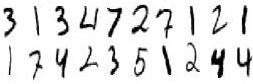

Kad bi naš zadatak bio raspoznati prometnu signalizaciju u sustavu za sigurnosnu inspekciju prometnica, razredi bi bili standardne oznake prometnih znakova (npr. A03, A04, A05, A33, B31 itd.) kao što to ilustrira sljedeća slika:

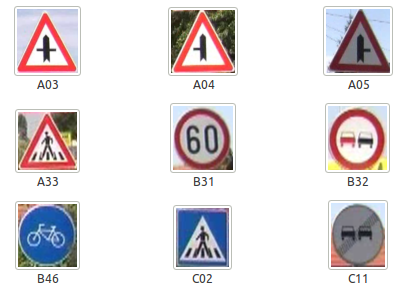

Postavlja se pitanje kako organizirati računalni program koji treba podržati učenje na primjerima označenih podataka. Principijelan prvi korak u tom smjeru jest izraziti dio programa koji treba učiti u obliku matematičke funkcije sa slobodnim parametrima. Tu funkciju nazivat ćemo modelom. Možda najjednostavniji model za naš konkretni primjer je:

$$\mathbf{y=argmax(W⋅x+b)}$$

Slobodni parametri tog modela su $\mathbf{W}$ i $\mathbf{b}$ . Pri tome $\mathbf{W}$ predstavlja matricu $\mathbf{C × D}$ , b je vektor $\mathbf{C × 1}$ , dok ⋅ označava matrično množenje. Intuitivno, takav model ulazni podatak $\mathbf{x}$ uspoređuje sa svakim od C redaka matrice $\mathbf{W}$ (skalarni produkt se pod nekim uvjetima može promatrati kao usporedba), te podatak svrstavamo u razred definiran indeksom retka koji je "najsličniji" podatku. U praksi ćemo koristiti diferencijalne varijante tog modela koje će omogućiti učenje gradijentnim spustom o kojem smo pričali u odjeljku 0b.

Da bismo model naučili, trebaju nam još dva koncepta: gubitak i optimizacijski postupak. Gubitak je funkcija koja kaže koliko se dobro predikcije modela poklapaju sa podatcima za učenje. Optimizacijski postupak "štima" parametre tako da gubitak na skupu za učenje bude što manji. 

Formalno, algoritam strojnog učenja definiran je modelom, gubitkom i optimizacijskim postupkom. Npr. kod logističke regresije koju ćemo detaljno upoznati u sljedećem odjeljku (0d) imamo:
 - model: softmax(W⋅x+b)
 - gubitak: negativna log-izglednost
 - optimizacijski postupak: gradijentni spust

Izlaz logističke regresije je C-dimenzionalni vektor koji predstavlja vjerojatnosti $P(Y = c_i|x)$ koje su pridružene događajima da podatak x pripada razredu $c_i$ . Modele s takvim izlazom svrstavamo u diskriminativne probabilističke modele.
 
    

<b>0d. Uvod u višerazrednu logističku regresiju</b>

Višerazredna logistička regresija [1] podrazumijeva probabilistički diskriminativni klasifikacijski model pripadnosti vektorskog podatka $\mathbf{x}$ razredima $c_{j}, j=0,1, \ldots, C-1$. Radi se o generaliziranom linearnom modelu koji afinu transformaciju podataka spljošćuje (engl. squash) na vjerojatnosni interval [0,1]. Ishod klasifikacije formalno prikazujemo slučajnom varijablom $Y$ za koju vrijedi $\sum_{j} P\left(Y=c_{j} \mid \mathbf{x}\right)=1 \forall \mathbf{x}$

U binarnom slučaju podatak može pripadati jednom od samo dvaju razreda $(C=2)$. Parametri modela tada su vektor $\mathbf{w}$ te pomak $b$, a rezultat modela su aposteriorne vjerojatnosti razreda $c_{0}$ i $c_{1}$ :

$$P\left(Y=c_{1} \mid \mathbf{x}\right)=\sigma\left(\mathbf{w}^{\top} \mathbf{x}+b\right), \space gdje je  \space \sigma(s)=e^{s} /\left(1+e^{s}\right)$$
$$P\left(Y=c_{0} \mid \mathbf{x}\right)=1-P\left(c_{1} \mid \mathbf{x}\right)$$

(ova tu sigma == sigmoida, spljoštuje sve na [0,1])

Pri tome podatci $\mathbf{x}$ imaju dimenzije Dx1, parametar $\mathbf{w}$ ima dimenzije Dx1, dok je parametar $b$ skalar.

Kad podatke klasificiramo u C razreda, model možemo sažeto formulirati sljedećim skupom jednadžbi (funkciju softmax ćemo objasniti u nastavku):

$$P\left(Y=c_{j} \mid \mathbf{x}\right)=\operatorname{softmax}(j, \mathbf{W} \cdot \mathbf{x}+\mathbf{b}), j=0,1, \ldots, C-1$$

Matrice $\mathbf{W}$ i $\mathbf{b}$ sadrže parametre postupka, a njihove dimenzije su CxD odnosno Cx1. Pri tome D predstavlja dimenzionalnost podataka, dok je C broj razreda. Vektor
$\mathbf{s}=\mathbf{W} \cdot \mathbf{x}+\mathbf{b}$ ima dimenzije Cx1 te sadrži tzv. klasifikacijske mjere razreda (možemo koristiti i prijevod klasifikacijski rezultat, engl. classification scores). Klasifikacijske
mjere pokazuju koliko je odgovarajući razred vjerojatniji (odnosno manje vjerojatan) u odnosu na druge razrede. Konačno, aposteriorne vjerojatnosti razreda dobivamo
funkcijom softmax čija j-ta komponenta odgovara izrazu:
$$\operatorname{softmax}(j, \mathbf{s})=e^{s_{j}} / \sum_{k} e^{s_{k}}$$.

Ako detaljnije razmotrimo definiciju funkcije softmax, primijetit ćemo da su
klasifikacijske mjere redundantne: kad svakoj od njih dodamo istu konstantu funkcija softmax na izlazu daje istu razdiobu. Iz toga slijedi da jednu od C klasifikacijskih mjera bez smanjenja općenitosti možemo fiksirati postavljanjem odgovarajućeg retka
parametara na nulu $\left(\mathbf{W}_{j,:}=b_{j}=0\right)$. Tako normalizirane klasifikacijske mjere mogu se interpretirati kao logaritmi omjera šansi promatranog razreda u odnosu na fiksirani razred. U praksi se pokazuje da postupak jednako dobro konvergira i ako optimiramo sve retke $\mathbf{W}$ i b. Stoga u implementaciji često optimiramo sve parametre jer se tako dobiva nešto jednostavniji programski kod. Međutim, redundantnost ulaza softmaksa u pravilu koristimo kako bismo izbjegli da eksponenciranje velikih klasifikacijskih mjera rezultira numeričkim preljevom. Primjer takve implementacije donosimo u nastavku:

In [1]:
 # stabilni softmax
def stable_softmax(x):
    exp_x_shifted = np.exp(x - np.max(x))
    probs = exp_x_shifted / np.sum(exp_x_shifted)
    return probs

Obratite pažnju da prikazani primjer funkcionira samo ako mu se kao ulazni argument pošalje tenzor prvog reda (vektor). U vježbi ćete takvu proceduru trebati primijeniti na matricu $N \times D$ u kojoj će svaki redak sadržavati klasifikacijske mjere odgovarajućeg podatka. Pokušajte to ostvariti bez eksplicitne petlje.
Parametre logističke regresije $\mathbf{W}$ i b određujemo optimiranjem funkcije gubitka $\mathcal{L}(\mathbf{W}, \mathbf{b})$ na skupu za učenje $\mathcal{D}$. Skup za učenje tipično se sastoji od parova podataka odgovarajućih oznaka razreda $\mathcal{D}=\left\{\left(\mathbf{x}_{\mathbf{i}}, y_{i}\right), i=1,2, \ldots, N\right\}$. Ovo je
najjednostavnije pojmiti na problemu klasifikacije $2 \mathrm{D}$ podataka u $\mathrm{C}$ različitih razreda. U tom slučaju $\mathbf{x}_{\mathbf{i}}$ su elementi ravnine, dok su $y_{i}$ elementi cjelobrojnog intervala između 0 i C-1. Gubitak logističke regresije odgovara negativnoj log-izglednosti parametara:
$$\mathcal{L}_{\mathrm{NLL}}(\mathbf{W}, \mathbf{b} \mid \mathcal{D})=-\sum_{i} \log P\left(Y=y_{i} \mid \mathbf{x}_{i}\right)$$.
Obratite pažnju na to da $P\left(Y=y_{i} \mid \mathbf{x}_{i}\right)$ označava vjerojatnost kojom model podatak $\mathbf{x}_{i}$ klasificira u točan razred $y_{i}$. (naravno, ovdje ne piše kako točno računamo tu vjerojatnost - to ovisi o konkretnom problemu :)). Ovako izražen gubitak favorizira parametre $\mathbf{W}$ i b koji točnim oznakama podataka za učenje pridružuju što veće vjerojatnosti. U praksi nas ništa ne sprječava da umjesto negativne log-izglednosti parametara optimiramo neki drugi gubitak. Međutim, za slučaj klasifikacije, tj. kada su predikcije kategoričke, negativna log-izglednost vrlo dobro funkcionira u praksi te je najdosljedniji izbor kad učimo na čvrstim oznakama (za meke oznake treba nam unakrsna entropija). Kada negativnu log-izglednost podijelimo brojem podataka, dobivamo izraz koji odgovara prosječnoj unakrsnoj entropiji između točne i prediktirane distribucije po svim podatcima (provjerite to za vježbu!):
$$
\mathcal{L}_{\mathrm{CE}}(\mathbf{W}, \mathbf{b} \mid \mathcal{D})=-\frac{1}{N} \sum_{i} \log P\left(Y=y_{i} \mid \mathbf{x}_{i}\right) \text {. }
$$
Ovakva formulacija gubitka pokazuje prosječnu točnost predikcije modela u pojedinim podatcima te tako olakšava praćenje napredovanja učenja i dijagnosticiranje problema učenjem. Dodatno, apsolutni iznos gradijenata parametara ovakvog gubitka ne ovisi o broju podataka što značajno olakšava ugađanje hiper-parametara postupka. Zbog toga ćemo u praksi uvijek koristiti usrednjeni ukupni gubitak (odnosno unakrsnu entropiju, $\mathcal{L}_{\mathrm{CE}}$ ) umjesto pozbrojenog ukupnog gubitka (odnosno negativne log-izglednosti, $\mathcal{L}_{\mathrm{NLL}}$ ).

Nažalost, optimiranje parametara logističke regresije ne možemo provesti u zatvorenom obliku, nego moramo posegnuti za nekim iterativnim postupkom. Na sreću, funkcija gubitka $\mathcal{L}_{\mathrm{CE}}$ je konveksna [2]. To znači da gradijentne metode poput gradijentnog spusta sigurno neće zapeti u nekom lokalnom optimumu (iako mogu podbaciti zbog drugih razloga).
Funkciju gubitka $\mathcal{L}_{\mathrm{CE}}$ možemo optimirati raznim gradijentnim postupcima. Takvi postupci u svakoj iteraciji učenja pomiču parametre u smjeru negativnog gradijenta gubitka. Period tijekom kojeg algoritam dobije na uvid sve podatke za učenje nazivamo epohom. Ovisno o težini problema, za konvergenciju su potrebne desetine, stotine, ili tisuće epoha.

Glavni izazov kod gradijentnih pristupa optimizacije predstavlja određivanje gradijenta gubitka po svim parametrima postupka. S obzirom na to da gubitak i-tog podatka u logističkoj regresiji možemo promatrati kao kompoziciju logaritmiranog softmaksa i afine transformacije podataka, gradijente određujemo primjenom pravila ulančavanja.

Literatura:

1) Jan Šnajder, Bojana Dalbelo Bašić: Strojno učenje. FER, Zagreb.\
2) http://qwone.com/~jason/writing/convexLR.pdf

<b>0e. Gradijenti binarne logističke regresije</b>

Ovdje ćemo skicirati optimirani postupak računanja parcijalnih derivacija funkcije gubitka binarne logističke regresije. Za početak, dogovorimo notaciju. Označimo gubitak i-tog podatka s $\mathcal{L}_{i}\left(\mathbf{w}, \mathbf{b} \mid x_{i}, y_{i}\right)=-\log P\left(Y=y_{i} \mid \mathbf{x}_{i}\right)$. Definirajmo parcijalnu derivaciju $\partial \mathcal{L}_{i} / \partial \mathbf{w}$ i predstavimo je retčanim vektorom u kojem se nalaze gradijenti gubitka $\mathcal{L}_{i}$ po elementima parametra w. Slično, neka parcijalna derivacija $\partial \mathcal{L}_{i} / \partial b$ bude retčani vektor gradijenata gubitka $\mathcal{L}_{i}$ po parametru $b$.
Kako bismo omogućili kompaktniji zapis aposteriorne vjerojatnost i-tog razreda, možemo uvesti proširenu sigmoidalnu funkciju koja uzima u obzir točan razred podatka čiju klasifikacijsku mjeru transformiramo u vjerojatnost:
$$
\sigma_{P}(y, s)=\left\{\begin{array}{ll}
\sigma(s), & y=c_{1} \\
1-\sigma(s), & y=c_{0}
\end{array}= \begin{cases}\frac{e^{s}}{1+e^{s}}, & y=c_{1} \\
\frac{1}{1+e^{s}}, & y=c_{0}\end{cases}\right.
$$
Sada gubitak $\mathcal{L}_{i}$ odgovara kompoziciji logaritmirane proširene sigmoide i afine redukcije i-tog podatka (podsjetimo se, $s_{i}$ označava skalarnu klasifikacijsku mjeru podatka $\mathbf{x}_{i}$ ):
$$
\begin{aligned}
&\mathcal{L}_{i}\left(\mathbf{w}, \mathbf{b} \mid \mathbf{x}_{i}\right)=-\log \sigma_{P}\left(y_{i}, s_{i}\right) \\
&s_{i}=\mathbf{w}^{\top} \mathbf{x}_{i}+b
\end{aligned}
$$
Gradijente parametara stoga možemo izraziti prema pravilu ulančavanja kao umnožak matrica parcijalnih derivacija (tzv. Jacobijevih matrica) funkcija $\mathcal{L}_{i}$ i $s_{i}$ :
$$
\begin{aligned}
&\partial \mathcal{L}_{i} / \partial \mathbf{w}=\partial \mathcal{L}_{i} / \partial s_{i} \cdot \partial s_{i} / \partial \mathbf{w} \\
&\partial \mathcal{L}_{i} / \partial b=\partial \mathcal{L}_{i} / \partial s_{i} \cdot \partial s_{i} / \partial b
\end{aligned}
$$
Parcijalna derivacija gubitka $\mathcal{L}$ po linearnom klasifikacijskom rezultatu $s$ u podatku $\mathbf{x}_{i}$ jest skalar $\partial \mathcal{L}_{i} / \partial s_{i}$ kojeg promatramo kao Jakobijan dimenzija 1x1. Parcijalne derivacije klasifikacijske mjere podatka $\mathbf{x}_{i}$ po elementima parametara $\mathbf{w}$ odnosno $b$, su matrica $\partial s_{i} / \partial \mathbf{w}$ dimenzija $1 \times \mathrm{D}$ odnosno skalar $\partial s_{i} / \partial b$ kojeg promatramo kao matricu 1x1. Izrazimo prvo derivaciju gubitka po klasifikacijskoj mjeri tako da ovisnost o točnom razredu i-tog podatka izrazimo Iversonovim uglatim zagradama. Ako se dogovorimo da vrijednost izraza $[[q]]$ iznosi 1 ako je $q$ istinit a nula inače, traženu parcijalnu derivaciju možemo predstaviti sljedećim izrazom (provjerite to za vježbu!):
$$
\partial \mathcal{L}_{i} / \partial s_{i}=P\left(c_{1} \mid \mathbf{x}_{i}\right)-[[ y_{i}=c_{1} ]] .
$$
Parcijalna derivacija klasifikacijske mjere po parametrima $\mathbf{w}$ i $b$ za podatak $\mathbf{x}_{i}$ sada je:
$$
\begin{aligned}
&\partial s_{i} / \partial \mathbf{w}=\mathbf{x}_{i}^{\top} \\
&\partial s_{i} / \partial b=1
\end{aligned}
$$
Kad uvedemo pokratu $\mathbf{g}_{s}=\left[\partial \mathcal{L}_{i} / \partial s_{i}\right]_{i=1}^{N}$ te uzmemo u obzir da ukupni gubitak zbraja doprinose po svim podatcima, dobivamo konačne izraze:
$$
\partial \mathcal{L} / \partial \mathbf{w}=1 / N \cdot \sum_{i} \partial \mathcal{L}_{i} / \partial \mathbf{w}=1 / N \cdot \sum_{i} g_{s i} \cdot \mathbf{x}_{i}^{\top}
$$
$$
\partial \mathcal{L} / \partial b=1 / N \cdot \sum_{i} \partial \mathcal{L}_{i} / \partial b=1 / N \cdot \sum_{i} q_{s i}
$$


Najbolja računska performansa danas se postiže izražavanjem petlji optimiranim operacijama nad matricama i vektorima. Zbog toga je jasno da ćemo u implementaciji računanje gradijenta pomaka izraziti pozivom odgovarajuće funkcije numeričke
biblioteke. Manje je međutim jasno kako izbjeći pisanje petlje za računanje gradijenata težina, pa ćemo tom važnom detalju pokloniti više pažnje.

Naime, pažljivim promatranjem možemo uočiti da računanje parcijalne derivacije $\partial \mathcal{L} / \partial \mathbf{w}$ možemo vektorizirati tako da zbroj po podatcima predstavimo matričnim umnoškom. Vektore podataka ćemo organizirati u matricu $\mathbf{X}$ dimenzija NxD. Retci matrice $\mathbf{X}$ odgovaraju podatcima $\mathbf{x}_{i}$. Parcijalne derivacije gubitaka po klasifikacijskoj mjeri smjestit ćemo u stupčani vektor $\mathbf{g}_{s}$ dimenzije $\mathrm{N}$. Kao što smo naveli ranije, vrijedi: $\mathbf{g}_{s}=\left[\partial \mathcal{L}_{i} / \partial s_{i}\right]_{i=1}^{N}$. Lako se vidi da gradijent gubitka po k-toj težini odgovara skalarnom produktu vektora $\mathbf{g}_{s}$ i k-tog stupca matrice $\mathbf{X}$ :

$$\partial \mathcal{L} / \partial w_{k}=1 / N \cdot \sum_{i} g_{s i} \cdot x_{i k}=1 / N \cdot \mathbf{g}_{s}^{\top} \mathbf{X}_{: k}$$

Sada je jasno da parcijalne derivacije ukupnog gubitka po svim težinama možemo dobit produktom vektora $\mathbf{g}_{\mathbf{s}}^{\top}$ i podatkovne matrice $$\mathbf{X} :
\partial \mathcal{L} / \partial \mathbf{w}=1 / N \cdot \mathbf{g}_{\mathbf{s}}^{\top} \cdot \mathbf{X}$$
Taj umnožak prikazan je na sljedećoj slici. Na slici se vidi da retci podatkovne matrice sadrže pojedinačne podatke te odgovaraju parcijalnoj derivaciji klasifikacijske mjere po vektoru težina za taj podatak. Stupci podatkovne matrice odgovaraju parcijalnim derivacijama po pojedinačnim komponentama vektora težina. Parcijalnu derivaciju ukupnog gubitka po k-toj težini dobivamo skalarnim produktom vektora $\mathbf{g}_{\mathrm{s}}$ i k-tog stupca matrice $\mathbf{X}$.

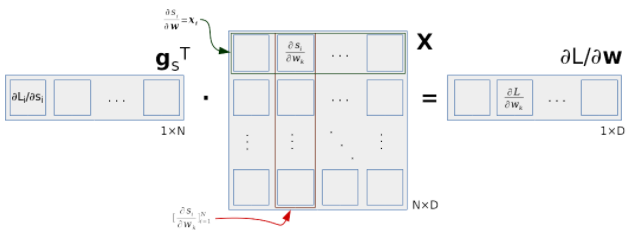

Napominjemo da postoji dobar razlog da matrica podataka ima strukturu NxD. U tom su slučaju komponente pojedinog podatka pohranjene na uzastopnim memorijskim lokacijama pa miješanje podataka i operacije nad grupama (engl. batch) uzrokuju manje promašaja priručne memorije. U programskoj implementaciji htjet ćemo dobiti gradijente grad_w koji po dimenzijama odgovaraju originalnim parametrima pa ćemo gornji izraz naprosto transponirati. U tom slučaju, poboljšane vrijednosti parametara dobivamo oduzimanjem gradijenata grad_w moduliranih hiper-parametrom param_delta.

<b>0f. Gradijenti višerazredne logističke regresije </b>

Jednadžbe gradijenata parametara višerazredne logističke regresije vrlo su slične odgovarajućim gradijentima binarne logističke regresije. To nas ne treba čuditi jer se lako uviđa da je softmax poopćenje sigmoidalne funkcije. Međutim, izražavanje tih gradijenata otežava struktura parametra W. Da izbjegnemo poteškoće, odvojeno ćemo promatrati gradijente svakog od $C$ redaka matrice $\mathbf{W}$, te usporedno s njima gradijente svakog od C elemenata vektora $\mathbf{b}$. Označimo te retke odnosno elemente $\mathbf{s} \mathbf{W}_{j \text { : }}$ i $b_{j}$, a njihove parcijalne derivacije s $\partial \mathcal{L} / \partial \mathbf{W}_{j:}$ (matrica dimenzija $1 \times \mathrm{D}$ ) i $\partial \mathcal{L} / \partial b_{j}$ (matrica dimenzija 1x1). Kao i ranije, gradijente je najlakše prikazati tako da ovisnost o točnom razredu i-tog podatka prikažemo Iversonovim uglatim zagradama. Prvo ćemo izraziti gradijent funkcije gubitka za i-ti podatak $\mathcal{L}_{i}$ po j-toj klasifikacijskoj mjeri (izvedite ovaj izraz za vježbu!): 
$$\partial \mathcal{L}_{i} / \partial s_{i j}=P\left(Y=c_{j} \mid \mathbf{x}_{i}\right)-[[ y_{i}=c_{j} ]]$$

U izvedbi je ove parcijalne derivacije najpraktičnije sakupiti u matricu $\mathbf{G}_{\mathbf{s}}=\left[\left[\partial \mathcal{L}_{i} / \partial s_{i j}\right]_{j=1}^{C}\right]_{i=1}^{N}$ dimenzija NxC. Kako bismo tu matricu efikasno izračunali, uvodimo matricu aposteriornih vjerojatnosti podataka $\mathbf{P}_{i j}=P\left(c_{j} \mid \mathbf{x}_{\mathbf{i}}\right)$ te matricu vektorski kodiranih oznaka $\mathbf{Y}$ :
$$
\mathbf{Y}_{i j}= \begin{cases}1, & y_{i}=c_{j} \\ 0, & y_{i} \neq c_{j}\end{cases}
$$
Sada matricu parcijalnih derivacija gubitka po klasifikacijskim mjerama dobivamo jednostavnim matričnim izrazom $\mathbf{G}_{\mathbf{s}}=\mathbf{P}-\mathbf{Y}$.

Parcijalne derivacije klasifikacijskih mjera po parametrima iste su kao i kod binarne logističke regresije:
$$
\begin{aligned}
&\partial s_{i j} / \partial \mathbf{W}_{j:}=\mathbf{x}_{\mathbf{i}}^{\top} \\
&\partial s_{i j} / \partial b_{j}=1
\end{aligned}
$$
Kad ulančimo gradijente komponenata gubitka te uzmemo u obzir da ukupni gubitak zbraja doprinose po svim podatcima, dobivamo izraz kojeg možemo koristiti u optimizacijskom postupku:

$$
\begin{aligned}
&\partial \mathcal{L} / \partial \mathbf{W}_{j:}=1 / N \cdot \sum_{i} \partial \mathcal{L}_{i} / \partial \mathbf{W}_{j:}=1 / N \cdot \sum_{i} \partial \mathcal{L}_{i} / \partial s_{i j} \cdot \partial s_{i j} / \partial \mathbf{W}_{j:} \\
&\partial \mathcal{L} / \partial \mathbf{W}_{j:}=1 / N \cdot \sum_{i} G_{s i j} \cdot \mathbf{x}_{i}^{\top} \\
&\partial \mathcal{L} / \partial b_{j}=1 / N \cdot \sum_{i} \partial \mathcal{L}_{i} / \partial b_{j}=1 / N \cdot \sum_{i} G_{s i j}
\end{aligned}
$$
Pažljivim promatranjem ovog izraza uočit ćemo ogromnu sličnost s odgovarajućim izrazom gradijenata parametara binarne logističke regresije. To nas ne treba čuditi, jer retci matrice težina $\mathbf{W}$ u višerazrednom gubitku sudjeluju na potpuno isti način kao i težine $\mathbf{w}$ u gubitku binarne logističke regresije. Komponente gradijenta $\partial \mathcal{L} / \partial \mathbf{W}_{j \text { : }}$ odgovaraju skalarnom produktu j-tog stupca matrice $\mathbf{G}_{s}$ sa stupcima podatkovne matrice X. Stoga bismo, kao i kod binarne logističke regresije, sve gradijente j-tog retka matrice težina mogli izračunati umnoškom vektora $\mathbf{G}_{\mathbf{s}: j}$ i matrice $\mathbf{X}$ :

$$
\partial \mathcal{L} / \partial \mathbf{W}_{j:}=1 / N \cdot \mathbf{G}_{\mathrm{s}: j} \cdot \mathbf{X} \text {. }
$$
Međutim, pokazuje se da u praksi možemo i bolje od toga. Važno svojstvo našeg problema jest da su parcijalne derivacije klasifikacijskih mjera po odgovarajućim redcima matrice težina međusobno jednake: $\partial s_{i j} / \partial \mathbf{W}_{j:}=\mathbf{x}_{\mathbf{i}}^{\top} \forall j$. Odatle slijedi da gradijente svih redaka matrice težina vrlo praktično možemo izračunati samo jednim matričnim umnoškom:
$$
\left[\partial \mathcal{L} / \partial \mathbf{W}_{j:}\right]_{j=1}^{C}=1 / N \cdot \mathbf{G}_{\mathbf{s}}^{\top} \cdot \mathbf{X}
$$

Prikazani izraz relativno je lako zapamtiti, ali iznimno teško objasniti reverse engineeringom. Često se može čuti objašnjenje kako do tog izraza dolazimo izravnom primjenom pravila ulančavanja. Međutim, takvo objašnjenje je netočno jer pravilom ulančavanja ne možemo računati parcijalne derivacije po matričnoj varijabli. Ako ustrajemo na takvom pristupu, morat ćemo ili izravnati matricu u vektor ili prihvatiti da Jakobijan u tom slučaju postaje tenzor trećeg reda. U oba slučaja složenost našeg algoritma bi se povećala jer ne bismo mogli iskoristiti inherentnu algebarsku strukturu problema, koju možemo jednostavno izraziti ovako:

$$\partial s_{i j} / \partial \mathbf{W}_{k:}=0, j \neq k$$

Stoga,izraz $\mathbf{G}_{\mathbf{s}}^{\top} \cdot \mathbf{X}$ treba promatrati kao kompliciranu optimizaciju, a ne kao početnu točku za razumijevanje načina za određivanje gradijenata matrice težina višerazredne logističke regresije. Molimo studente koji prakticiraju nelinearno učenje da ovu netrivijalnu ali vrlo važnu činjenicu prihvate i zapamte što je moguće prije.
Optimirani izraz za računanje gradijenata višerazredne logističke regresije prikazan je na sljedećoj slici. Na slici vidimo da doprinos svakog podatka gradijentima težina odgovara vanjskom umnošku stupca matrice $\mathbf{G}_{\mathbf{s}}^{\top}$ (odnosno, retka matrice $\mathbf{G}_{\mathbf{s}}$ ) i odgovarajućeg retka podatkovne matrice. Kad bismo imali jedan podatak (indeks i) i kad bismo računali gradijente samo jednog retka matrice težina (indeks j), matrica $\mathbf{G}_{\mathbf{s}}$ svela bi se na element $\mathbf{G}_{\mathbf{s} i j}$, a matrica $\mathbf{X}$ na redak $\mathbf{x}_{i}$.

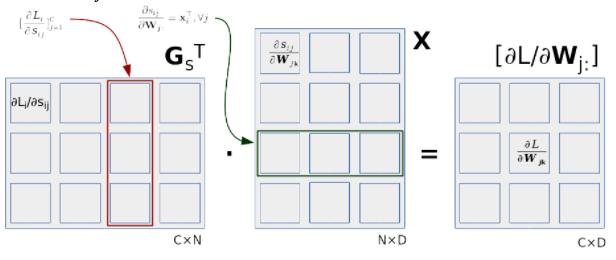

U praksi, gradijente težina $\left[\frac{\partial \mathcal{L}}{\partial \mathbf{W}_{j}}\right]_{j=1}^{C}$ računat ćemo jednim pozivom funkcije matrične biblioteke, npr. grad_W $=1 / \mathrm{N} * \mathrm{np} \cdot \operatorname{dot}(\mathrm{Gs} T, \quad x)$. Na taj način jednim pozivom rješavamo sljedeća dva zadatka:
- istovremeno računanje gradijenata svih redaka matrice $\mathbf{W}$
- akumuliranje doprinosa svih podataka $\mathbf{x}_{i}$;
Vrlo sličan postupak imat ćemo i za gradijent pomaka b, samo što ćemo umjesto matričnog množenja pozivati funkciju za istovremeno zbrajanje svih stupaca matrice, npr. np.sum(GsT, axis=1).

Ovakve manevre vrlo rado ćemo koristiti u praksi kako programske petlje ne bi bile u programskom jeziku visoke razine nego u optimiranom bibliotečnom kodu koji može biti i do 100 puta brži od naivnog koda u C-u. Naime, ako je numpy preveden s OpenBLASom, izvedba matričnog množenja će koristiti optimirani kod koji jako pazi na promašaje cachea i temelji se na ručno optimiranom strojnom kodu koji je prilagođen za konkretnu mikroarhitekturu. Nadalje, ako je OpenBLAS konfiguriran da koristi OpenMP, u naš algoritam biti će upregnute sve procesorske jezgre - a to bi rezultiralo dodatnim ubrzanjem. Neke konkretne brojeve možete pogledati ovdje (u tim eksperimentima


<b>0g. Uvod u Python </b>

Python je moderni dinamički jezik opće namjene koji je zbog svoje univerzalne primjenljivosti postao iznimno popularan u područjima vezanim uz umjetnu inteligenciju. Ako niste položili Skriptne jezike, predlažemo da samostalno proučite skriptu ili knjigu. Koristit ćemo Python 3. Preporučamo vam da isprobate naprednu interaktivnu ljusku ipython.

Izvorni kod u Pythonu smještamo u datoteke koje nazivamo modulima. Svaki modul u sebi treba sadržavati kratki ispitni program koji testira funkcionalnost modula i ilustrira njegovo pravilno korištenje. Ispitne programe smještamo na kraj modula u tijelu uvjetne naredbe koja testira je li modul pokrenut kao glavni program. Na taj način omogućavamo provođenje testiranja jednostavnim izvršavanjem modula.


Postoji više načina za debuggiranje u Pythonu. Jedan od najzgodnijih oslanja se na ugrađeni Pythonov debugger pdb kojeg možemo pozvati izravno iz koda. Da bismo to proveli, potrebno je prvo uključiti odgovarajući modul:

In [2]:
  import pdb

Zatim, na mjestu gdje želimo prekinuti izvođenje (breakpoint!) navedemo poziv:

In [3]:
#  pdb.set_trace()
pass

Nakon tog poziva Python će otvoriti interaktivnu ljusku u kojoj će biti dostupna sva imena programa koja su bila vidljiva u trenutku poziva funkcije set_trace. Iz ljuske možemo ispisivati objekte, pozivati proizvoljne funkcije (!) i izvršavati proizvoljne naredbe Pythona (!). Pored toga, na raspolaganju nam je i čitav niz specijalnih naredbi za debuggiranje. Popis tih naredbi dobivamo naredbom help (neke od važnijih naredbi su up, down i continue). Sličan učinak možemo postići i pozivom funkcije IPython.embed() (međutim, tu naredbe za debuggiranje nisu dostupne).

Na kraju ćemo pokazati kako debuggirati kod koji baca neočekivane iznimke na sljedećem minimalnom primjeru:

In [4]:
  def proba():
    a=5
    #raise ValueError("Iznimka!")
  
  if __name__=="__main__":
    proba()

Testiranjem ovog programa vrlo lako se možemo uvjeriti da njegovo izvršavanje završava iznimkom ValueError. Malo teže je međutim doći do podrobnijih informacija o stanju programa na mjestu gdje se iznimka dogodila, poput npr. ispisivanja vrijednosti imena a. Problem možemo riješiti pokretanjem debuggera pdb proba.py te zadavanjem naredbe continue (skraćeno "c"). Dubugger će početi izvoditi program te kad dođe do neuhvaćene iznimke omogućit će nam uvid u stanje programa preko tekstovnog korisničkog sučelja. Primjerice, naredba print a će ispisati vrijednost imena a neposredno prije bacanja iznimke. Do debuggera možemo doći i iz alternativne ljuske ipython na način da nakon interaktivnog poziva čije izvršavanje završava neuhvaćenom iznimkom zadamo naredbu debug.

Ovaj tekst pretpostavlja rad u čistom Pythonu, a ne korištenje posrednika poput Jupytera i sl. Ako vam se sviđa, slobodno koristite Jupyter, ali ne garantiramo da će sve raditi kako piše u ovim uputama.

<b>0h. Uvod u Numpy </b>

Numpy je popularna numerička biblioteka za Python. U primjerima ćemo koristiti standardnu pokratu np do koje dolazimo naredbom:

In [5]:
  import numpy as np

Matplotlib je biblioteka koja se često kombinira s numpyjem, a služi za izradu raznih vrsta grafova u Pythonu. U primjerima ćemo koristiti standardnu pokratu plt do koje dolazimo naredbom:

In [6]:
  import matplotlib.pyplot as plt

Važna prednosti numpyja jest mogućnost svođenja iterativnih postupaka na vektorske i matrične izraze. Za primjer, pogledajmo kako bismo u numpyju izrazili afinu
transformaciju podataka koja predstavlja važan korak pri učenju logističke regresije.
Neka su podatci zadani numpyjevom matricom x dimenzija NxD (svaki redak odgovara jednom D-dimenzijskom podatku), neka je transponirana matrica težina $\mathbf{W}^{\top}$ zadana numpyjevom matricom w_t dimenzija DxC te neka je transponirani vektor pomaka $\mathbf{b}^{\top}$ zadan numpyjevim vektorom b_t dimenzija 1xC. Tada afinu transformaciju svih
podataka dobivamo jednostavnim pozivom numpyjevih funkcija za matrično množenje i zbrajanje:

In [7]:
 #H = np.dot(X, W_t) + b_t # predstavlja yi = xi*wi + bi ali ZA SVAKI X
pass

Obratimo međutim pozornost na jedan detalj koji bi nakon površnog pogleda mogao i promaknuti. Pažljivom analizom prikazane naredbe Pythona uočavamo da dimenzije pribrojnika ne odgovaraju: matrični umnožak $n$. $\operatorname{dot}\left(x, w_{-} t\right)$ ima dimenzije $N x C$ dok vektor b_t ima dimenziju 1xC ( $\mathrm{N}$ != 1). Biblioteka numpy takva nesuglasja rješava pod pretpostavkom da vektor b_t treba dodati *svakom* retku matričnog umnoška. Stoga će nakon izvršavanja naredbe dodjeljivanja ime $\boldsymbol{n}$ uistinu referencirati matricu čiji retci odgovaraju afino transformiranim retcima podatkovne matrice. Kad se podsjetimo da se i-ti podatak nalazi u i-tom retku matrice podataka $\left(\mathbf{x}_{i}=\mathbf{X}_{i:}^{\top}\right.$ ), konačnu vrijednost i-tog retka matrice н moći ćemo zapisati i sljedećim izrazom: $\mathbf{H}_{i:}^{\top}=\mathbf{W} \cdot \mathbf{x}_{i}+\mathbf{b}$.
Upravo smo vidjeli da numpy po potrebi automatski umnožava operand manje dimenzionalnosti (engleski termin je broadcasting) kako bi došao do valjanog izraza. Ovakvo izražavanje je ispočetka vrlo teško prihvatiti, ali nakon nekog vremena postaje jasno da prednosti (sažetost i efikasnost) uvjerljivo nadjačavaju nedostatke.

<b>1. Stvaranje umjetnog skupa podataka</b>

U ovoj vježbi ćemo izvesti razred Random2DGaussian koji će nam omogućiti uzorkovanje 2D podataka generiranih slučajnom Gaussovom distribucijom. Konstruktor razreda treba stvarati parametre slučajne bivarijatne Gaussove razdiobe (vektor μ i matricu Σ). Metoda get_sample(n) treba vratiti n slučajno uzorkovanih 2D podataka u numpyjevom polju dimenzija Nx2. Položaj i varijanca razdiobe trebaju biti ograničeni fiksnim parametrima.

Pomoć:

 - Definirajte raspon prihvatljivih vrijednosti za obje koordinate sredine razdiobe μ (npr. minx=0, maxx=10, miny=0, maxy=10); neka to budu podatkovni članovi razreda.
 - Slučajno izaberite sredinu razdiobe μ prema uniformnoj razdiobi (np.random.random_sample).
 - Slučajno odaberite svojstvene vrijednosti kovarijacijske matrice Σ prema uniformnoj razdiobi i organizirajte ih u dijagonalnu matricu D. Neka gornja granica svojstvenih vrijednosti ovisi o rasponu prihvatljivih vrijednosti parametra μ, npr.  eigvalx = (np.random.random_sample()*(maxx - minx)/5)**2
 - Slučajno odaberite kut rotacije kovarijacijske matrice i na temelju njega formirajte rotacijsku matricu $R=\left[\begin{array}{cc}\cos (\varphi) & -\sin (\varphi) \\ \sin (\varphi) & \cos (\varphi)\end{array}\right]$.
 - Odredite matricu Σ kao umnožak transponirane matrice R, matrice D i matrice R.
 - Za uzorkovanje koristite funkciju np.random.multivariate_normal.
 - Kako biste osigurali ponovljivost eksperimenata sa slučajno generiranim podatcima, numpyjev generator slučajnih brojeva slobodno inicijalizirajte na konstantu:  np.random.seed(100)


Ispravnost koda provjerite sljedećim ispitnim programom: 

In [8]:
from data import *
import matplotlib.pyplot as plt
# kad radis nesto sa importovima, svaki put kad nesto promijenis u tom importu treba restartati kernel da bi skuzio promjene

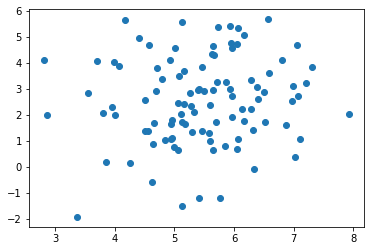

In [9]:
if __name__=="__main__":
    G=Random2DGaussian()
    X=G.get_sample(100)
    plt.scatter(X[:,0], X[:,1])
    plt.show()

<b>2. Učenje binarne logističke regresije gradijentnim spustom</b>

Ponovite binarnu logističku regresiju prema odjeljcima 0d i 0e.

Napišite funkciju binlogreg_train koja optimizira parametre logističke regresije w i b
 na zadanom skupu podataka za učenje. U vašem izvornom kodu koristite sljedeća imena:
 - X: matrica podataka dimenzija NxD;
 - Y_: vektor točnih razreda podataka dimenzija Nx1 (koristimo ga tijekom učenja);
 - Y: vektor predviđenih razreda podataka dimenzija Nx1 (koristimo ga tijekom ispitivanja performanse).

Neka funkcija ima sljedeće sučelje:

In [10]:
import numpy as np
# funkcija optimizira parametre logističke regresije w i b na zadanom skupu podataka za učenje
# drugim riječima, funkcija trenira model logističke regresije

def binlogreg_train(X,Y_, param_niter=100, param_delta=0.6, verbose=False):
    pass
    '''
        Argumenti
          X:  podatci, np.array NxD
          Y_: vektor točnih razreda podataka dimenzija Nx1, koristimo ga tijekom učenja
    
        Povratne vrijednosti
          w, b: parametri logističke regresije
    '''
    w = np.random.randn(2, 1)
    b = 0
    print(w)
    print(b)

    # gradijentni spust (param_niter iteracija)
    for i in range(param_niter):
        # klasifikacijske mjere - pokazuju koliko je odgovarajući razred vjerojatniji (ili manje vjerojatan u odnosu na druge razrede), ali mjera nije u interavlu [0,1]
        scores = np.dot(X, w) + b  # N x 1, vektor s

        # aposteriorne vjerojatnosti razreda c_1, P(c1|X) -> koristimo softmax
        probs = sigmoid(scores)  # N x 1

        # gubitak L(w,b) - doslovno prepisan iz uputa
        loss = -np.sum(np.log(probs))

        # dijagnostički ispis
        if verbose and i % 10 == 0:
            print("iteration {}: loss {}".format(i, loss))

        # derivacije gubitka po klasifikacijskim mjerama
        # to je parcijalno Li po si = P(ci|Xi) - [[Yi == c1]]
        # y_ = matrica gdje su 0 tamo gdje je c0, a 1 gdje je c1
        # dakle, Y_ nam je [[Yi = c1]]
        dL_dscores = probs - Y_  # N x 1, ovo je matrica Gs

        # gradijenti parametara

        n = len(X)

        grad_w = np.sum(np.dot(X.transpose(), dL_dscores), axis=1, keepdims=True)/n # D x 1
        grad_b = np.sum(dL_dscores)/n # 1 x 1

        # poboljšani parametri
        w += -param_delta * grad_w
        b += -param_delta * grad_b
    
    return w, b


  # stabilni softmax
def stable_softmax(x):
    exp_x_shifted = np.exp(x - np.max(x))
    probs = exp_x_shifted / np.sum(exp_x_shifted)
    return probs

def sigmoid(x):
    return np.exp(x) / (1 + np.exp(x))

Upute:
 - Inicijalizirajte w prema normalnoj distribuciji N(0,1) (np.random.randn) te b na nulu
 - Otvorite petlju gradijentnog spusta. Broj iteracija postupka zadajte hiper-parametrom param_niter.
  - Izračunajte klasifikacijske mjere svih podataka na način da petlje prepustite numpyju (scores = np.dot(X, w) + b).
  - Izračunajte aposteriorne vjerojatnosti razreda u svim podatcima P (c1|X) na način da petlje prepustite numpyju
  - Izračunajte gubitak L ( w , b ) na način da petlje prepustite numpyju.
  - Izračunajte gradijente grad_w i grad_b na način da petlje prepustite numpyju.
  - Izmijenite parametre u smjeru negativnog gradijenta (neka faktor pomaka param_delta bude hiper-parametar postupka).  

Napišite funkciju binlogreg_classify koja klasificira zadani skup podataka u skladu sa zadanim parametrima logističke regresije. Neka funkcija ima sljedeće sučelje:

In [11]:
def binlogreg_classify(X,w,b):
    '''
      Funkcija klasificira zadani skup podataka u skladu sa zadanim
      parametrima logističke regresije
      Argumenti
          X:    podatci, np.array NxD
          w, b: parametri logističke regresije

      Povratne vrijednosti
          probs: vjerojatnosti razreda c1
    '''
    h = np.dot(X,w.reshape(-1,1)) + b
    return sigmoid(h)

Napišite funkciju sample_gauss_2d(C, N) koja stvara C slučajnih bivarijatnih Gaussovih razdioba (prisjetimo se, njih smo u zadatku 1 implementirali razredom Random2DGaussian), te iz svake od njih uzorkuje N podataka. Funkcija treba vratiti matricu X dimenzija (N·C)x2 čiji retci odgovaraju uzorkovanim podatcima te matricu točnih razreda Y dimenzija (N·C)x1 čiji jedini stupac sadrži indeks razdiobe iz koje je uzorkovan odgovarajući podatak. Ako je i-ti redak matrice X uzorkovan iz razdiobe j, onda mora biti Y[i,0]==j.

In [12]:
from data import sample_gauss_2d

Napišite funkciju eval_perf_binary(Y,Y_) koja na temelju predviđenih i točnih indeksa razreda određuje pokazatelje performanse binarne klasifikacije: točnost (engl. accuracy), preciznost (engl. precision) te odziv (engl. recall). Implementaciju te funkcije temeljite na brojnostima istinitih pozitiva (TP), lažnih pozitiva (FP), istinith negativa (TN) i lažnih negativa (FN).

In [13]:
def eval_perf_binary(Y, Y_):
  tp = sum(np.logical_and(Y==Y_, Y_==True))
  fn = sum(np.logical_and(Y!=Y_, Y_==True))
  tn = sum(np.logical_and(Y==Y_, Y_==False))
  fp = sum(np.logical_and(Y!=Y_, Y_==False))
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)
  accuracy = (tp + tn) / (tp+fn + tn+fp)
  return accuracy, recall, precision

Napišite funkciju eval_AP koja računa prosječnu preciznost binarne klasifikacije. Neka funkcija na ulazu prima rangiranu listu točnih razreda Y r koju dobivamo kad matricu točnih razreda Y sortiramo prema aposteriornim vjerojatnostima odgovarajućih podataka P ( c 1 | x ) . Rangiranu listu točnih razreda možete dobiti pozivom metode argsort numpyjevog polja. Prosječnu preciznost možete izračunati primjenom sljedećeg izraza: $$\mathrm{AP}=\frac{\sum_{i=0}^{N-1} \operatorname{Preciznost}(i) \cdot \mathbf{Y}_{\mathbf{r} i}}{\sum_{i=0}^{N-1} \mathbf{Y}_{\mathbf{r} i}}$$
Pri tome $\operatorname{Preciznost}(i)$ odgovara preciznosti u
slučaju kad podatke s indeksom većim ili jednakim $i$ pridružimo razredu $c_{1}$, a podatke $s$ indeksom manjim od $i$ - razredu $c_{0}$. Evo kako bi se trebala ponašati vaša funkcija:

In [14]:
from data import eval_AP
import data
print(eval_AP([0,0,0,1,1,1]))
print(eval_AP([0,0,1,0,1,1]))
print(eval_AP([0,1,0,1,0,1]))
print(eval_AP([1,0,1,0,1,0]))

1.0
0.9166666666666666
0.7555555555555555
0.5


Napišite ispitni kod za modul binlogreg.py. Formirajte skup za učenje pozivom funkcije sample_gauss_2d. Pozovite funkciju za učenje te nakon toga provedite klasifikaciju primjera za učenje. Predviđene vjerojatnosti podataka pretvorite u indekse razreda Y pod pretpostavkom odabira razreda s najvećom vjerojatnošću (izbjegnite petlju u Pythonu!). Ispišite pokazatelje performanse dobivene pozivima funkcija eval_perf_binary te eval_AP. 

In [15]:

np.random.seed(100)

# get the training dataset
X,Y_ = sample_gauss_2d(2, 100)

# train the model
w,b = binlogreg_train(X, Y_, verbose=True)

# evaluate the model on the training dataset
probs = binlogreg_classify(X, w,b)
Y = probs > 0.5

# report performance
accuracy, recall, precision = data.eval_perf_binary(Y, Y_)
AP = data.eval_AP(Y_[probs.argsort()])
print (accuracy, recall, precision, AP)

[[ 1.48789443]
 [-0.35781685]]
0
iteration 0: loss 0.37427893720138045
iteration 10: loss 0.001310545230154331
iteration 20: loss 0.0012469497064061784
iteration 30: loss 0.0011893784685807673
iteration 40: loss 0.001137007029312133
iteration 50: loss 0.0010891554485337053
iteration 60: loss 0.001045257901502932
iteration 70: loss 0.0010048396384241664
iteration 80: loss 0.0009674993198692187
iteration 90: loss 0.0009328953175106459
0.5 1.0 0.5 [nan]


<ipython-input-10-9dcdcbf6f52b>:29: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs))
C:\Users\Dorian\Projekt\DU nulti labos\data.py:85: RuntimeWarning: invalid value encountered in true_divide
  recall = tp / (tp + fn)
C:\Users\Dorian\Projekt\DU nulti labos\data.py:98: RuntimeWarning: invalid value encountered in true_divide
  return sumprec/pos


<b>3. Grafički prikaz rezultata klasifikacije</b>

(200, 2)
(200,)
[False False False False False False False False False False False False
 False False False False False False False  True False False  True False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False  True False  True False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  Tru

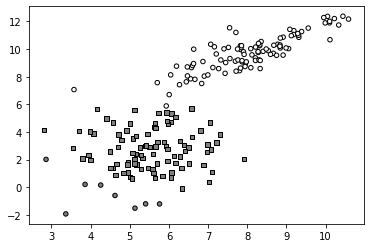

In [16]:
def myDummyDecision(X):
    scores = X[:,0] + X[:,1] - 5
    return scores

if __name__=="__main__":
    np.random.seed(100)
  
    # get the training dataset
    X,Y_ = data.sample_gauss_2d(2, 100)
  
    # get the class predictions
    Y = myDummyDecision(X)>0.5
  
    # graph the data points
    graph_data(X, Y_, Y) 
  
    # show the results
    plt.show()

<b>4.Iscrtavanje funkcije odluke</b>

Cilj je razviti potprogram graph_surface koji iscrtava plohu zadane skalarne funkcije 2D varijable kako bismo njime mogli iscrtavati plohe funkcije odluke klasifikatora dvodimenzionalnih podataka.



<b>5. Grafički prikaz logističke regresije </b>

Potrebna nam je funkcija koja bi bila prikladna za slanje potprogramu graph_surface. U slučaju binarne logističke regresije, željena funkcija trebala bi primiti podatke x, a vratiti vektor aposteriorne vjerojatnosti razreda. Funkcija binlogreg_classify izgleda kao obećavajući kandidat, ali ne može se izravno primijeniti jer prima dva argumenta viška (w i b). U programskim jezicima sa statičkim funkcijama ovaj izazov bismo teško riješili bez globalnih varijabli. Međutim, u Pythonu ovo možemo lakoćom izvesti primjenom kontekstne funkcije (engl. closure) koju možemo konstruirati pozivom sljedeće funkcije:

In [17]:
 def binlogreg_decfun(w,b):
    def classify(X):
      return binlogreg_classify(X, w,b)
    return classify

Funkcija binlogreg_decfun vraća lokalnu funkciju koja pamti kontekst (w,b). Stoga tu lokalnu funkciju možemo koristiti kao argument funkcije graph_surface (radi se o oblikovnom obrascu Dekorator). Prikazana fukcionalnost može se sažetije ostvariti lambda izrazom (napravite to za vježbu!). Početnicima savjetujemo da napreduju malim koracima te da lambda izraze koji pamte kontekst počnu koristiti tek nakon što u potpunosti usvoje kontekstne funkcije.

Sada konačno možemo iscrtati rezultate naše izvedbe binarne logističke regresije sljedećim kodom

[[ 1.48789443]
 [-0.35781685]]
0
iteration 0: loss 0.37427893720138045
iteration 10: loss 0.001310545230154331
iteration 20: loss 0.0012469497064061784
iteration 30: loss 0.0011893784685807673
iteration 40: loss 0.001137007029312133
iteration 50: loss 0.0010891554485337053
iteration 60: loss 0.001045257901502932
iteration 70: loss 0.0010048396384241664
iteration 80: loss 0.0009674993198692187
iteration 90: loss 0.0009328953175106459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

<ipython-input-10-9dcdcbf6f52b>:29: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(probs))
<ipython-input-13-f2901b173432>:6: RuntimeWarning: invalid value encountered in true_divide
  recall = tp / (tp + fn)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

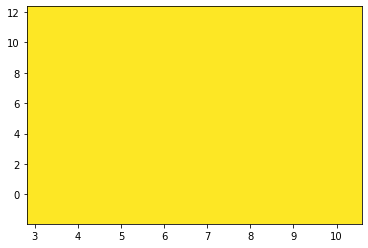

In [20]:
from data import graph_surface
if __name__=="__main__":
    np.random.seed(100)

    # instantiate the dataset
    X,Y_ = sample_gauss_2d(2, 100)

    # train the logistic regression model
    w, b = binlogreg_train(X, Y_, verbose=True)

    # evaluate the model on the train set
    probs = binlogreg_classify(X, w, b)

    # recover the predicted classes Y
    Y = probs > 0.5
    Y = Y.reshape(-1, 1)

    # evaluate and print performance measures
    acc, recall, precision = eval_perf_binary(Y, Y_)
    AP = eval_AP(Y_[probs.flatten().argsort()])
    print(acc, recall, precision, AP)

    # graph the decision surface
    decfun = binlogreg_decfun(w,b)
    bbox=(np.min(X, axis=0), np.max(X, axis=0))
    graph_surface(decfun, bbox, offset=0.5)

    # graph the data points
    graph_data(X, Y_, Y, special=[])

    # show the plot
    plt.show()